In [42]:
# coding: utf-8
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

『ガウス過程と機械学習』4章

# 確率的生成モデルとガウス過程

# 確率変数と確率的生成モデル
既知であるはずの内容は飛ばす．

既知の内容：確率密度関数，条件付き分布，周辺化，ベイズの定理，確率変数の独立性，最尤法

新しい内容：混合ガウス分布，確率的生成モデル，グラフィカルモデル，ベイズ最適化，ノンパラメトリックモデル

## 定義4.1（確率過程):関数$f(x)$を確率的に生成する生成器
任意のN個の入力$\vec{x_1},...,\vec{x_N}$に対して，

N個の出力値$\vec{f_N} = (f(\vec{x_1}) ,..., f(\vec{x_N}))$の同時確率$p(\vec{f_N}) = p(f(\vec{x_1}) ,..., f(\vec{x_N}))$を与えることができるとき，この関係$f(・)$を確率過程と呼ぶ．

## 定義4.2（ガウス過程）
確率過程$f(・)$が任意のN個の入力$\vec{x_1},...,\vec{x_N}$に対して，

N個の出力値$\vec{f_N} = (f(\vec{x_1}) ,..., f(\vec{x_N}))$の同時確率$p(\vec{f_N}) = p(f(\vec{x_1}) ,..., f(\vec{x_N}))$がガウス分布に従うとき，この関係$f(・)$をガウス過程と呼ぶ．

表記として
$$
f 〜 \textbf{GP}(\mu(\vec{x}), k(\vec{x}, \vec{x}'))
$$
とかく．

$\textbf{注意}$

本来この分布は無限次元のガウス分布ですが，観測された有限個のデータに対する$(f(\vec{x_1}) ,..., f(\vec{x_N}))$に限って残りを周辺化したものを扱います．

ガウスカーネルの例：
$$
f 〜 \textbf{GP}(\mu(\vec{x}), k(\vec{x}, \vec{x}'))
$$
ただし，平均ベクトルは$\vec{\mu} = \vec{0}$でガウスカーネルは
$$
k(x , x^{'}) = \theta_1 \exp{\left( - \frac{(x - x^{'})^2}{\theta_2} \right)}
$$

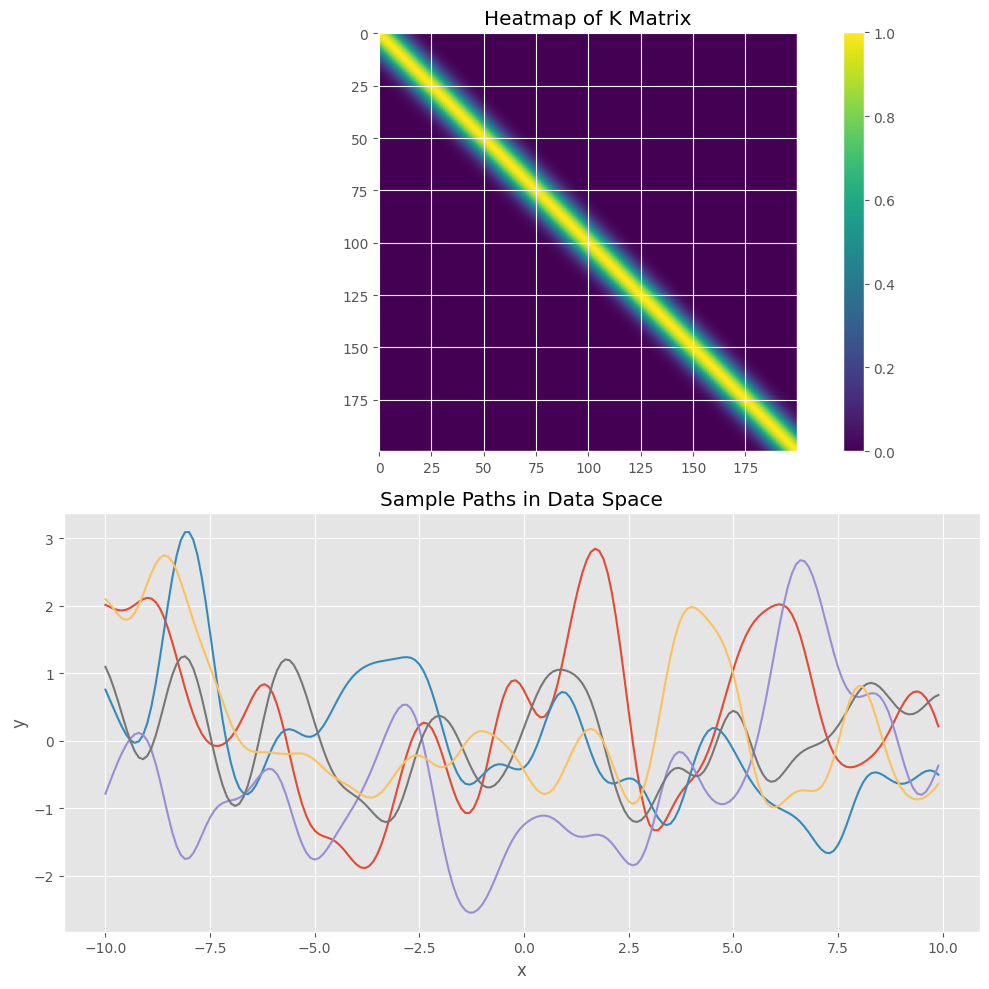

In [92]:
import numpy as np
import matplotlib.pyplot as plt

# カーネル関数を定義
def kernel(x, x_prime, p, q):
    return p * np.exp(-1 * (x - x_prime)**2 / q)

# カーネル計算を実行する関数
def compute_kernel(X, Theta_1, Theta_2):
    inputdata_length = len(X)
    K = np.zeros((inputdata_length, inputdata_length))  # 2次元配列
    for x in range(inputdata_length):
        for x_prime in range(inputdata_length):
            K[x, x_prime] = kernel(X[x], X[x_prime], Theta_1, Theta_2)
    return K

kai = np.arange(-10, 10, 0.1)
mu = 0 * kai
K = compute_kernel(kai, 1, 1)
y = np.random.multivariate_normal(mu, K, 5)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))
im = ax1.imshow(K)
ax1.set_title("Heatmap of K Matrix")
plt.colorbar(im, ax=ax1)

ax2.plot(kai, y.T)
ax2.set_title("Sample Paths in Data Space")
ax2.set_xlabel("x")
ax2.set_ylabel("y")
plt.tight_layout()
plt.show()

指数カーネルの例：
$$
f 〜 \textbf{GP}(\mu(\vec{x}), k(\vec{x}, \vec{x}'))
$$
ただし，平均ベクトルは$\vec{\mu} = \vec{0}$で指数カーネルは
$$
k(x , x^{'}) = \exp{\left( - \frac{|x - x^{'}|}{\theta} \right)}
$$

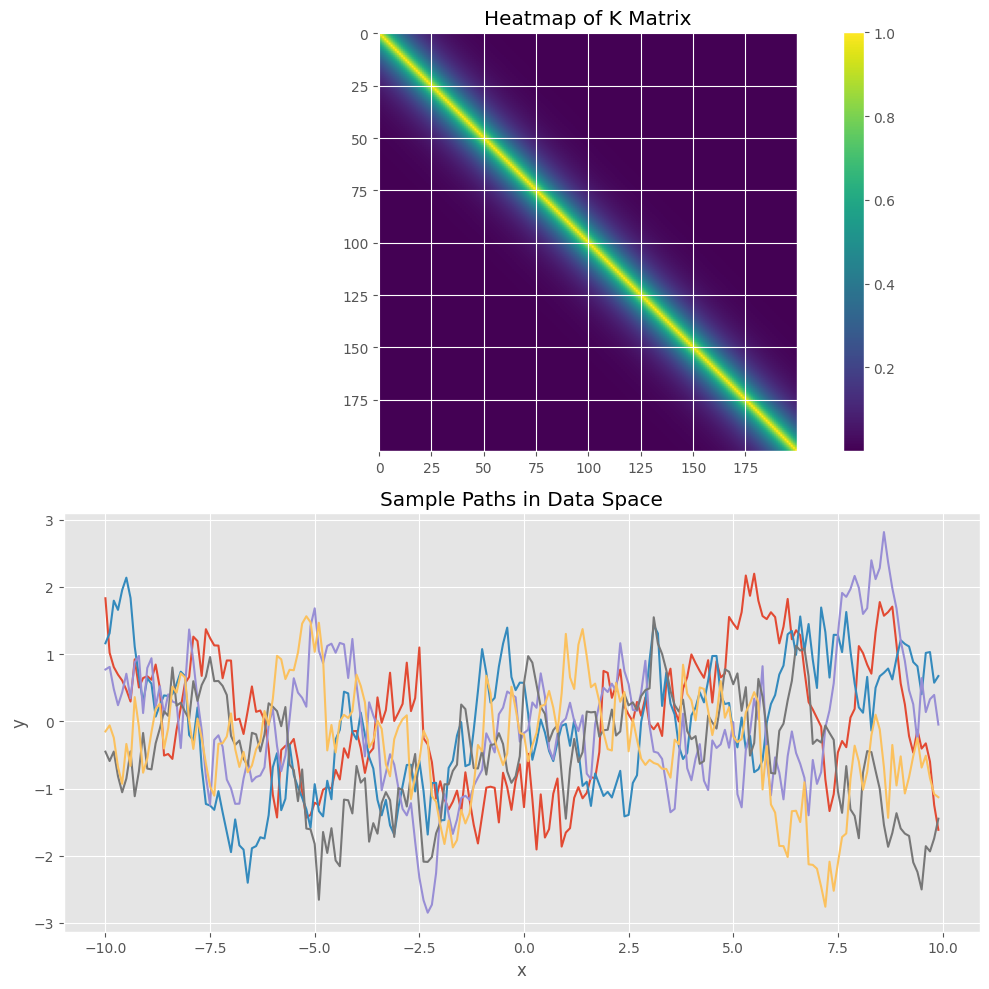

In [95]:
import numpy as np
import matplotlib.pyplot as plt

# カーネル関数を定義
def kernel(x, x_prime, p):
    return np.exp(-1 * np.abs(x - x_prime) / p)

# カーネル計算を実行する関数
def compute_kernel(X, p):
    inputdata_length = len(X)
    K = np.zeros((inputdata_length, inputdata_length))  # 2次元配列
    for x in range(inputdata_length):
        for x_prime in range(inputdata_length):
            K[x, x_prime] = kernel(X[x], X[x_prime], p)
    return K

# データセットの準備
X = np.arange(-10, 10, 0.1)
p = 1.0

# カーネル行列の計算
K = compute_kernel(X, p)

# データ空間でのサンプルパスの生成
sample_paths = np.random.multivariate_normal(np.zeros(len(X)), K, 5)

# カーネル行列とデータ空間でのサンプルパスのプロット
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

im = ax1.imshow(K)
ax1.set_title("Heatmap of K Matrix")
plt.colorbar(im, ax=ax1)

ax2.plot(X, sample_paths.T)
ax2.set_title("Sample Paths in Data Space")
ax2.set_xlabel("x")
ax2.set_ylabel("y")
plt.tight_layout()
plt.show()

## 混合ガウス分布
混合ガウス分布は，ガウス分布の重み付き和で表される確率分布です．
$$
p(\vec{t}\ |\ \vec{x}) = \sum_{k=1}^K \pi_k(\vec{x}) \mathcal{N}(\vec{t}\ |\ \vec{\mu}_k(\vec{x}), \Sigma_k(\vec{x}))
$$

以下にはjpdfの等高線を表示します．

$K = 3$

$ \mu_1 = (-1, 0), \mu_2 = (0, 1), \mu_3 = (2, -2)$

$\pi_1 = 0.4, \pi_2 = 0.3, \pi_3 = 0.3$

$$
\Sigma_1 =\begin{pmatrix} 0.2 & 0.1 \\ 0.1 & 0.2 \end{pmatrix}
$$
$$
\Sigma_2 =\begin{pmatrix} 0.2 & -0.1 \\ -0.1 & 0.2 \end{pmatrix}
$$
$$
\Sigma_3 =\begin{pmatrix} 0.4 & 0 \\ 0 & 0.2 \end{pmatrix}
$$

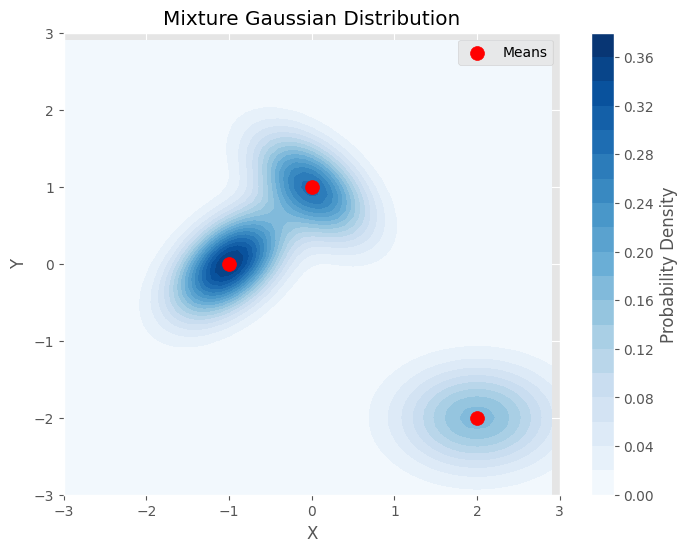

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# 混合ガウス分布のパラメータ
num_components = 3
means = np.array([[-1, 0], [0, 1], [2, -2]])
covs = np.array([[[0.2, 0.1], [0.1, 0.2]], [[0.2, -0.1], [-0.1, 0.2]], [[0.4 , 0], [0, 0.2]]])
weights = np.array([0.4, 0.3, 0.3])

# プロット範囲の設定
x_min, x_max = -3, 3
y_min, y_max = -3, 3
grid_size = 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, grid_size), np.arange(y_min, y_max, grid_size))
grid = np.stack((xx, yy), axis=2)

# 混合ガウス分布の計算
pdf = np.zeros_like(xx)
for i in range(num_components):
    pdf += weights[i] * multivariate_normal.pdf(grid, mean=means[i], cov=covs[i])

# プロット
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, pdf, levels=20, cmap='Blues')
plt.colorbar(label='Probability Density')
plt.scatter(means[:, 0], means[:, 1], c='red', marker='o', s=100, label='Means')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Mixture Gaussian Distribution')
plt.legend()
plt.grid(True)
plt.show()

上記の分布からサンプルを取る

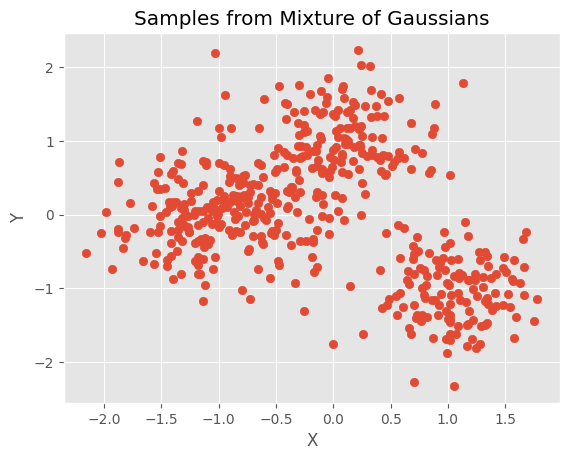

In [54]:
import matplotlib.pyplot as plt
import numpy as np

# 混合ガウス分布のパラメータ
num_components = 3
means = np.array([[-1, 0], [0, 1], [1, -1]])
covs = np.array([[[0.2, 0], [0, 0.2]], [[0.2, 0], [0, 0.2]], [[0.2, 0], [0, 0.2]]])
weights = np.array([0.4, 0.3, 0.3])

# サンプル生成
np.random.seed(0)
samples = []
for _ in range(500):
    component = np.random.choice(num_components, p=weights)
    sample = np.random.multivariate_normal(means[component], covs[component])
    samples.append(sample)
samples = np.array(samples)

# プロット
plt.scatter(samples[:, 0], samples[:, 1])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Samples from Mixture of Gaussians')
plt.show()

## 例3（サイコロ・ダーツの連鎖的モデル）
サイコロを振って出た結果$d$でねらいを定める場所を決めるゲームのシミュレーション．

この場合，サイコロの出目は均等に出ると仮定すると
$$
p(d) = \frac{1}{6}
$$
となり，サイコロの出目がわかったときの条件付き分布は
$$
p(\vec{x}\ |\ d) = \mathcal{N}(\vec{x} |\ \vec{\mu}(d), \sigma^2 I)
$$
となる．よって，無条件における$\vec{x}$の分布は
$$
p(\vec{x}) = \sum_{d=1}^6 \frac{1}{6} \mathcal{N}(\vec{x} |\ \vec{\mu}(d), \sigma^2 I)
$$
となります．

以下では，これらのシミュレーションを行います．

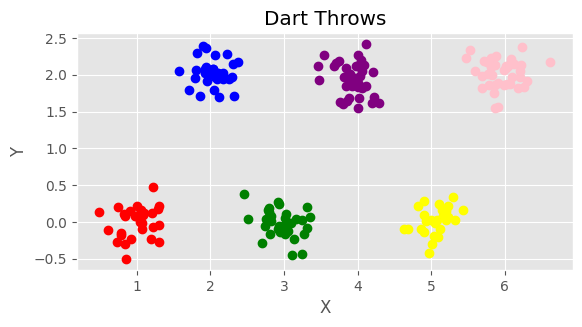

In [55]:
def throw_dart():
    dice_roll = np.random.randint(1, 7)  # サイコロを振る
    target_positions = {
        1: np.array([1, 0]),
        2: np.array([2, 2]),
        3: np.array([3, 0]),
        4: np.array([4, 2]),
        5: np.array([5, 0]),
        6: np.array([6, 2])
    }
    target_position = target_positions[dice_roll]  # 狙う位置を取得

    mean = target_position  # 平均は狙う位置
    variance = 0.2  # 分散（ガウスノイズの分散）

    dart_throw = np.random.normal(mean, variance)  # ガウスノイズを加えてダーツを放つ
    return dart_throw, dice_roll

colors = {
    1: 'red',
    2: 'blue',
    3: 'green',
    4: 'purple',
    5: 'yellow',
    6: 'pink'
}

# ダーツを200回投げる例
np.random.seed(0)  # 乱数のシードを設定して再現性を確保
throws = [throw_dart() for _ in range(200)]

# 結果の表示とプロット
fig, ax = plt.subplots()
ax.set_aspect('equal')

for i, (throw, dice_roll) in enumerate(throws):
    color = colors[dice_roll]
    ax.plot(throw[0], throw[1], 'o', color=color)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Dart Throws')
plt.show()

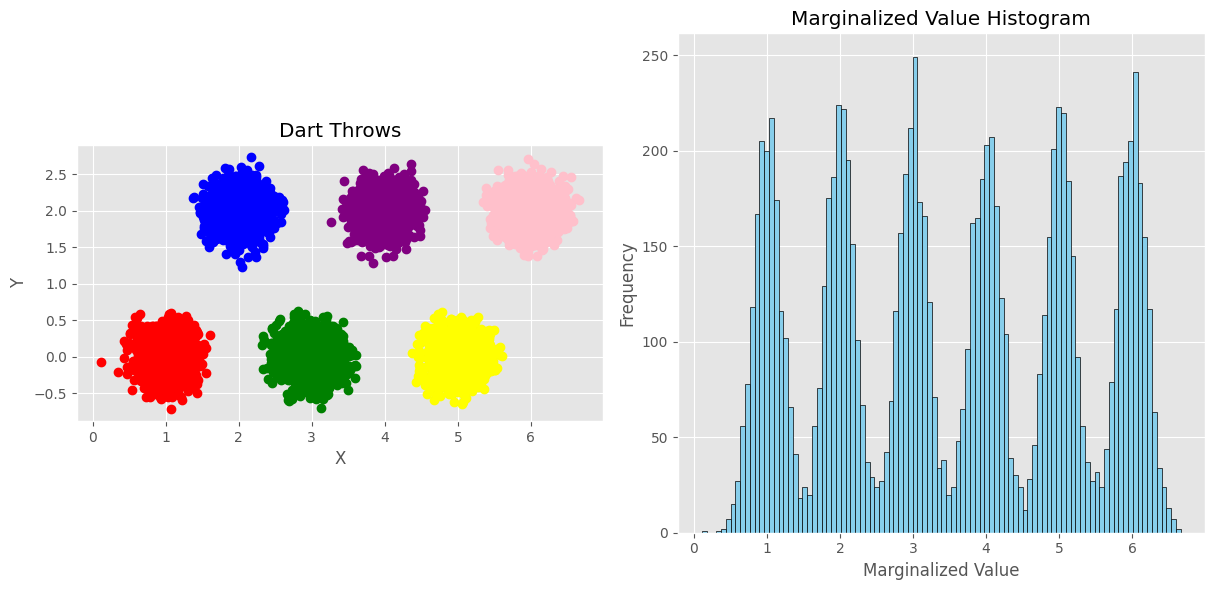

In [56]:
def throw_dart():
    dice_roll = np.random.randint(1, 7)  # サイコロを振る
    target_positions = {
        1: np.array([1, 0]),
        2: np.array([2, 2]),
        3: np.array([3, 0]),
        4: np.array([4, 2]),
        5: np.array([5, 0]),
        6: np.array([6, 2])
    }
    target_position = target_positions[dice_roll]  # 狙う位置を取得

    mean = target_position  # 平均は狙う位置
    variance = 0.2  # 分散（ガウスノイズの分散）

    dart_throw = np.random.normal(mean, variance)  # ガウスノイズを加えてダーツを放つ
    return dart_throw, dice_roll

# ダーツを1000回投げる例
np.random.seed(0)  # 乱数のシードを設定して再現性を確保
throws = [throw_dart() for _ in range(10000)]

# 結果の表示とプロット
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# ダーツの着地点をプロット
ax1.set_aspect('equal')

for throw, dice_roll in throws:
    color = colors[dice_roll]
    ax1.plot(throw[0], throw[1], 'o', color=color)

ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_title('Dart Throws')

# 周辺化した値のヒストグラムをプロット
marginalized_values = np.array([throw[0] for throw, _ in throws])
ax2.hist(marginalized_values, bins=100, color='skyblue', edgecolor='black')
ax2.set_xlabel('Marginalized Value')
ax2.set_ylabel('Frequency')
ax2.set_title('Marginalized Value Histogram')

plt.tight_layout()
plt.show()

## 確率的生成モデリング(probabilistic generative model)
確率的生成モデリングとは，観測される値の生成過程を確率分布で表現する作業のことです．

以下に抽象的だが手順を説明します．

### 1.未知の値を確率変数で表す(x , d)
### 2.ここの値が生成される確率的な過程をそれぞれ確率分布で表す(p(d) , p(x|d)
### 3.すべての確率変数の同時分布を表す(p(x,d) = p(d)p(x|d)
### 4.必要な周辺分布を求める(p(x))

## 例4（ガウス過程回帰モデル）
$\vec{y}$の生成過程は，以下のような連鎖的事象です．
$$
\vec{f}\ \ \ 〜\ \mathcal{N}(\vec{\mu}, K)
$$
$$
\vec{y}|\vec{f}\  〜\ \mathcal{N}(\vec{f}, \sigma^2 I)
$$

このとき，$\vec{y}$の分布は$\vec{f}$に対する周辺化
$$
p(\vec{y}) = \int p(\vec{y}|\vec{f})p(\vec{f})d\vec{f}
$$
によって得ることができます．

# グラフィカルモデル(graphical model)
グラフィカルモデルとは，確率変数間の依存関係をグラフで表現したものです．

教科書の図4.4を参考にグラフィカルモデルの書き方を学びましょう．

$\textbf{板書}$

# 最尤推定とベイズ推定
## 確率生成モデルと最尤推定
確率生成モデルとは，『現実世界における観測$Y$は，何らかの確率分布$p(Y)$からのサンプリング$Y〜p(Y)$によって得られたものだ』と仮説することとあります．

例3のサイコロ・ダーツの連鎖的モデルを例にとって最尤法をしてみましょう．(例12)

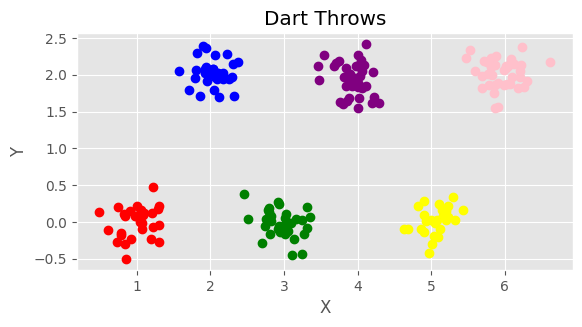

In [57]:
def throw_dart():
    dice_roll = np.random.randint(1, 7)  # サイコロを振る
    target_positions = {
        1: np.array([1, 0]),
        2: np.array([2, 2]),
        3: np.array([3, 0]),
        4: np.array([4, 2]),
        5: np.array([5, 0]),
        6: np.array([6, 2])
    }
    target_position = target_positions[dice_roll]  # 狙う位置を取得

    mean = target_position  # 平均は狙う位置
    variance = 0.2  # 分散（ガウスノイズの分散）

    dart_throw = np.random.normal(mean, variance)  # ガウスノイズを加えてダーツを放つ
    return dart_throw, dice_roll

colors = {
    1: 'red',
    2: 'blue',
    3: 'green',
    4: 'purple',
    5: 'yellow',
    6: 'pink'
}

# ダーツを200回投げる例
np.random.seed(0)  # 乱数のシードを設定して再現性を確保
throws = [throw_dart() for _ in range(200)]

# 結果の表示とプロット
fig, ax = plt.subplots()
ax.set_aspect('equal')

for i, (throw, dice_roll) in enumerate(throws):
    color = colors[dice_roll]
    ax.plot(throw[0], throw[1], 'o', color=color)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Dart Throws')
plt.show()

### 参考：EMアルゴリズム

混合ガウス分布に関する最尤推定は，EMアルゴリズムを用いて行います．これは教科書には記載されていませんが，参考までに以下に記載します．

https://qiita.com/kenmatsu4/items/59ea3e5dfa3d4c161efb

>方針
>1. [初期化] まず、求めるパラメータ$\pi,\mu,\Sigma$に初期値をセットし、対数尤度の計算結果を算出。
>2. [Eステップ] 負担率$\gamma(z_{nk})$を計算する。
>3. [Mステップ] 対数尤度関数をパラメータ$\pi,\mu,\Sigma$で微分して０と置き、最尤解を求める。
>4. [収束確認] 対数尤度を再計算し、前回との差分があらかじめ設定していた収束条件を満たしていなければ2.にもどる、満たしていれば終了する。

また，カテゴリ数はこちらで指定する必要があります．そのためのモデル評価指標としてBICを用います．

https://qiita.com/s-yonekura/items/882cdc786a51688974ff

$$
BIC = -2\log L + d \log n
$$

ここで$L$は尤度，$d$はモデルに含まれるパラメータ数，$n$データ数です．

In [70]:
import numpy as np
from scipy.stats import multivariate_normal

# サンプル生成関数
def throw_dart():
    dice_roll = np.random.randint(1, 7)  # サイコロを振る
    target_positions = {
        1: np.array([1, 0]),
        2: np.array([2, 2]),
        3: np.array([3, 0]),
        4: np.array([4, 2]),
        5: np.array([5, 0]),
        6: np.array([6, 2])
    }
    target_position = target_positions[dice_roll]  # 狙う位置を取得

    mean = target_position  # 平均は狙う位置
    variance = 0.2  # 分散（ガウスノイズの分散）

    dart_throw = np.random.normal(mean, variance)  # ガウスノイズを加えてダーツを放つ
    return dart_throw, dice_roll


# EMアルゴリズム
def em_algorithm(samples, num_components, num_iterations):
    # パラメータの初期化
    weights = np.ones(num_components) / num_components  # 初期の混合比は均等に設定
    means = np.random.randn(num_components, 2)  # 平均の初期値をランダムに設定
    covs = np.tile(np.identity(2), (num_components, 1, 1))  # 共分散行列の初期値を単位行列に設定

    for _ in range(num_iterations):
        # Eステップ
        responsibilities = np.zeros((len(samples), num_components))
        for j in range(num_components):
            responsibilities[:, j] = weights[j] * multivariate_normal.pdf(samples, mean=means[j], cov=covs[j])
        responsibilities /= np.sum(responsibilities, axis=1, keepdims=True)

        # Mステップ
        N = np.sum(responsibilities, axis=0)
        means = np.dot(responsibilities.T, samples) / N[:, None]
        for j in range(num_components):
            diff = samples - means[j]
            covs[j] = np.dot(responsibilities[:, j] * diff.T, diff) / N[j]
        weights = N / len(samples)

    return weights, means, covs

def calculate_bic(X, means, covs, weights):
    num_components = len(weights)
    num_samples = len(X)
    num_features = X.shape[1]

    log_likelihood = np.sum(np.log(np.sum([
        weights[i] * multivariate_normal.pdf(X, mean=means[i], cov=covs[i])
        for i in range(num_components)], axis=0)))

    num_parameters = num_components * (num_features + (num_features * (num_features + 1)) // 2 + 1)

    bic = -2 * log_likelihood + num_parameters * np.log(num_samples)

    return bic


# サンプルの生成
np.random.seed(0)
samples = []
for _ in range(100):
    sample, _ = throw_dart()
    samples.append(sample)
samples = np.array(samples)

# EMアルゴリズムの実行
num_components = 3
num_iterations = 100
weights, means, covs = em_algorithm(samples, num_components, num_iterations)

# 推定されたパラメータの表示
print("Estimated Weights:", weights)
print("Estimated Means:")
for j in range(num_components):
    print(f"Component {j+1}: {means[j]}")
print("Estimated Covariances:")
for j in range(num_components):
    print(f"Component {j+1}:")
    print(covs[j])

Estimated Weights: [0.20353022 0.45170461 0.34476517]
Estimated Means:
Component 1: [1.66502169 1.34423209]
Component 2: [4.72077429 1.9651127 ]
Component 3: [3.21886929 0.0060213 ]
Estimated Covariances:
Component 1:
[[0.24153258 0.47081305]
 [0.47081305 1.00593246]]
Component 2:
[[1.43288039 0.03930192]
 [0.03930192 0.04399698]]
Component 3:
[[ 2.43324786 -0.03498371]
 [-0.03498371  0.02586988]]


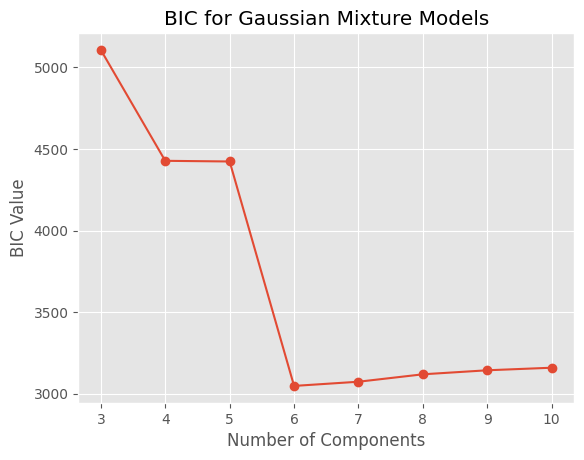

In [68]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import multivariate_normal

def throw_dart():
    dice_roll = np.random.randint(1, 7)  # サイコロを振る
    target_positions = {
        1: np.array([1, 0]),
        2: np.array([2, 2]),
        3: np.array([3, 0]),
        4: np.array([4, 2]),
        5: np.array([5, 0]),
        6: np.array([6, 2])
    }
    target_position = target_positions[dice_roll]  # 狙う位置を取得

    mean = target_position  # 平均は狙う位置
    variance = 0.2  # 分散（ガウスノイズの分散）

    dart_throw = np.random.normal(mean, variance)  # ガウスノイズを加えてダーツを放つ
    return dart_throw, dice_roll

def em_algorithm(X, num_components, max_iterations=100):
    num_samples, num_features = X.shape

    # 初期化
    means = np.zeros((num_components, num_features))
    covs = np.zeros((num_components, num_features, num_features))
    weights = np.ones(num_components) / num_components

    for i in range(num_components):
        means[i] = np.random.rand(num_features) * (np.max(X, axis=0) - np.min(X, axis=0)) + np.min(X, axis=0)
        covs[i] = np.eye(num_features)

    # EMアルゴリズムの反復
    for _ in range(max_iterations):
        # E-step
        responsibilities = np.zeros((num_samples, num_components))
        for j in range(num_components):
            responsibilities[:, j] = weights[j] * multivariate_normal.pdf(X, mean=means[j], cov=covs[j])
        responsibilities /= np.sum(responsibilities, axis=1, keepdims=True)

        # M-step
        for j in range(num_components):
            weights[j] = np.mean(responsibilities[:, j])
            means[j] = np.sum(responsibilities[:, j].reshape(-1, 1) * X, axis=0) / np.sum(responsibilities[:, j])
            # 共分散行列を修正
            covs[j] = np.dot((responsibilities[:, j].reshape(-1, 1) * (X - means[j])).T, (X - means[j])) / np.sum(responsibilities[:, j])
            covs[j] += np.eye(num_features) * 1e-6  # 正定値性のために小さな値を加える

    return means, covs, weights


def calculate_bic(X, means, covs, weights):
    num_components = len(weights)
    num_samples = len(X)
    num_features = X.shape[1]

    log_likelihood = np.sum(np.log(np.sum([
        weights[i] * multivariate_normal.pdf(X, mean=means[i], cov=covs[i])
        for i in range(num_components)], axis=0)))

    num_parameters = num_components * (nuの特徴（役職・肩書き・入社年次など）
年次の高い人事の方

m_features + (num_features * (num_features + 1)) // 2 + 1)

    bic = -2 * log_likelihood + num_parameters * np.log(num_samples)

    return bic

# データ生成
np.random.seed(0)
num_samples = 1000
x = np.zeros((num_samples, 2))
dice_rolls = np.zeros(num_samples, dtype=int)
for i in range(num_samples):
    x[i], dice_rolls[i] = throw_dart()

# クラスタ数の範囲
min_components = 3
max_components = 10

bic_values = []
for num_components in range(min_components, max_components + 1):
    # EMアルゴリズムの実行
    means_estimated, covs_estimated, weights_estimated = em_algorithm(x, num_components)

    # 共分散行列の修正
    for i in range(num_components):
        covs_estimated[i] += np.eye(len(covs_estimated[i])) * 1e-6

    # BICの計算
    bic = calculate_bic(x, means_estimated, covs_estimated, weights_estimated)
    bic_values.append(bic)

# BIC値のプロット
plt.plot(range(min_components, max_components + 1), bic_values, marker='o')
plt.xlabel('Number of Components')X = np.array([1, 2, 3, 4, 5])
t = np.array([3, 4, 5, 6, 7])
plt.ylabel('BIC Value')
plt.title('BIC for Gaussian Mixture Models')
plt.show()

BIC値が一番小さいのは，カテゴリ数6のようなので，カテゴリ数6で混合ガウス分布を当てはめます．

In [99]:
import numpy as np
from scipy.stats import multivariate_normal

# サンプル生成関数
def throw_dart():
    dice_roll = np.random.randint(1, 7)  # サイコロを振る
    target_positions = {
        1: np.array([1, 0]),
        2: np.array([2, 2]),
        3: np.array([3, 0]),
        4: np.array([4, 2]),
        5: np.array([5, 0]),
        6: np.array([6, 2])
    }
    target_position = target_positions[dice_roll]  # 狙う位置を取得

    mean = target_position  # 平均は狙う位置
    variance = 0.2  # 分散（ガウスノイズの分散）

    dart_throw = np.random.normal(mean, variance)  # ガウスノイズを加えてダーツを放つ
    return dart_throw, dice_roll


# EMアルゴリズム
def em_algorithm(samples, num_components, num_iterations):
    # パラメータの初期化
    weights = np.ones(num_components) / num_components  # 初期の混合比は均等に設定
    means = np.random.randn(num_components, 2)  # 平均の初期値をランダムに設定
    covs = np.tile(np.identity(2), (num_components, 1, 1))  # 共分散行列の初期値を単位行列に設定

    for _ in range(num_iterations):
        # Eステップ
        responsibilities = np.zeros((len(samples), num_components))
        for j in range(num_components):
            responsibilities[:, j] = weights[j] * multivariate_normal.pdf(samples, mean=means[j], cov=covs[j])
        responsibilities /= np.sum(responsibilities, axis=1, keepdims=True)

        # Mステップ
        N = np.sum(responsibilities, axis=0)
        means = np.dot(responsibilities.T, samples) / N[:, None]
        for j in range(num_components):
            diff = samples - means[j]
            covs[j] = np.dot(responsibilities[:, j] * diff.T, diff) / N[j]
        weights = N / len(samples)

    return weights, means, covs

def calculate_bic(X, means, covs, weights):
    num_components = len(weights)
    num_samples = len(X)
    num_features = X.shape[1]

    log_likelihood = np.sum(np.log(np.sum([
        weights[i] * multivariate_normal.pdf(X, mean=means[i], cov=covs[i])
        for i in range(num_components)], axis=0)))

    num_parameters = num_components * (num_features + (num_features * (num_features + 1)) // 2 + 1)

    bic = -2 * log_likelihood + num_parameters * np.log(num_samples)

    return bic


# サンプルの生成
np.random.seed(0)
samples = []
for _ in range(100):
    sample, _ = throw_dart()
    samples.append(sample)
samples = np.array(samples)

# EMアルゴリズムの実行
num_components = 6
num_iterations = 100
weights, means, covs = em_algorithm(samples, num_components, num_iterations)

# 推定されたパラメータの表示
print("Estimated Weights:", weights)
print("Estimated Means:")
for j in range(num_components):
    print(f"Component {j+1}: {means[j]}")
print("Estimated Covariances:")
for j in range(num_components):
    print(f"Component {j+1}:")
    print(covs[j])

Estimated Weights: [0.05094233 0.08708497 0.04283963 0.58       0.06616514 0.17296793]
Estimated Means:
Component 1: [ 1.1425275 -0.0060686]
Component 2: [ 2.91750854 -0.04736708]
Component 3: [0.79741991 0.09992725]
Component 4: [4.12482712 1.99409347]
Component 5: [1.07127496 0.08260489]
Component 6: [4.45929868 0.00827755]
Estimated Covariances:
Component 1:
[[0.02591387 0.0383891 ]
 [0.0383891  0.11588219]]
Component 2:
[[ 0.01498588 -0.01277502]
 [-0.01277502  0.01264338]]
Component 3:
[[ 0.03361126 -0.00326071]
 [-0.00326071  0.00047748]]
Component 4:
[[ 2.3700287  -0.0304753 ]
 [-0.0304753   0.04220893]]
Component 5:
[[ 0.01486337 -0.00894572]
 [-0.00894572  0.00923131]]
Component 6:
[[ 0.80881992 -0.01293654]
 [-0.01293654  0.03540986]]


## 確率生成モデルとベイズ推定
ベイズ推定は『知りたいもの（パラメータ$\theta$）は確率変数だ』と考えます．

また，ベイズ推定において未知のパラメータ$\theta$の「推定」とは，観測$X$を得ることによって確率変数$\theta$の分布を更新することだと考えます．

単純な線形モデル$y(x , \vec{\omega}) = \omega_0 + x \omega_1$に対して，パラメータ事前分布を多変量標準正規分布として，逐次的に事後分布を更新します．

パラメータの事前分布が
$$
p(\vec{\omega}) = \mathcal{N}(\vec{\omega}|\vec{0}, \alpha^{-1}I)
$$
と定められ，尤度が
$$
p(\vec{t}|\vec{\omega}, X) = \prod_{n=1}^N \mathcal{N}(t_n|y(x_n, \vec{\omega}), \beta^{-1})
$$
で与えられる時，
N回目の逐次学習が終わった後の事後分布は
$$
p(\vec{\omega}|X, \vec{t}_N) = \mathcal{N}(\vec{\omega}|\vec{m}_N, S_N)
$$
ただし， 
$$
\vec{m}_N = \beta S_N \Phi^T \vec{t}
$$
$$
\vec{S}_N^{-1} = \alpha I + \beta \Phi^T \Phi
$$

事前分布のプロット

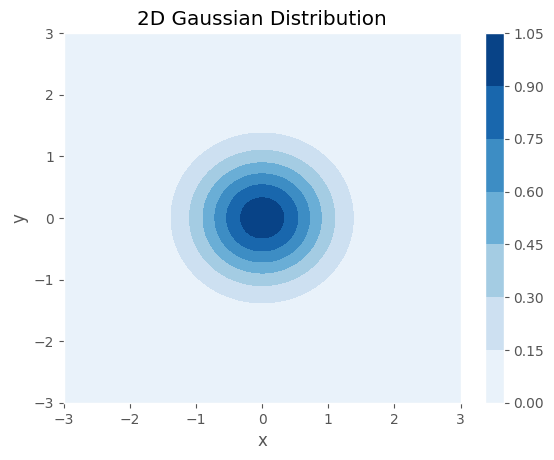

In [185]:
# パラメータ
alpha = 0.5

# 平均と共分散行列
m = np.zeros(2)
S_inv = alpha * np.eye(2)
S = np.linalg.inv(S_inv)

# 2次元正規分布のメッシュグリッドの作成
x_range = np.linspace(-3, 3, 100)
y_range = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x_range, y_range)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

# 2次元正規分布の計算
Z = np.exp(-0.5 * np.sum(np.dot(pos - m, S) * (pos - m), axis=2))
Z /= np.max(Z)

# プロット
plt.contourf(X, Y, Z, cmap='Blues')
plt.xlabel('x')
plt.ylabel('y')
plt.title('2D Gaussian Distribution')
plt.colorbar()
plt.show()

5回更新した後の事後分布の形状を見ましょう．

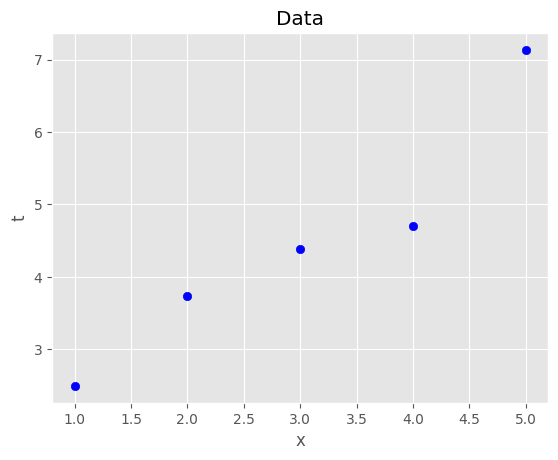

In [186]:
# パラメータの設定
beta = 0.75

# データ
X = np.array([1, 2, 3, 4, 5])
t = np.array([3, 4, 5, 6, 7]) + beta * np.random.normal(0, 1, 5)  # 正規乱数を追加

# プロット
plt.scatter(X, t, marker='o', color='blue')
plt.xlabel('x')
plt.ylabel('t')
plt.title('Data')
plt.show()


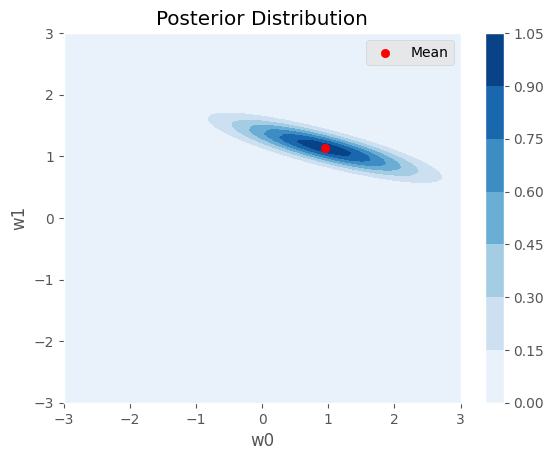

In [188]:
# デザイン行列の作成
phi = np.column_stack((np.ones_like(X), X))

# 事後分布の更新
S_inv = alpha * np.eye(2) + beta * np.dot(phi.T, phi)
S = np.linalg.inv(S_inv)
m = beta * np.dot(S, np.dot(phi.T, t))

# ガウス分布のプロット
x_range = np.linspace(-3, 3, 100)
y_range = np.linspace(-3, 3, 100)
X_plot, Y_plot = np.meshgrid(x_range, y_range)
pos = np.empty(X_plot.shape + (2,))
pos[:, :, 0] = X_plot
pos[:, :, 1] = Y_plot
Z = np.exp(-0.5 * np.sum(np.dot(pos - m, S_inv) * (pos - m), axis=2))
Z /= np.max(Z)

plt.contourf(X_plot, Y_plot, Z, cmap='Blues')
plt.xlabel('w0')
plt.ylabel('w1')
plt.title('Posterior Distribution')
plt.colorbar()
plt.scatter(m[0], m[1], color='red', label='Mean')
plt.legend()
plt.show()

この様にパラメータの更新ができます．

# 確率分布の表現
## ノンパラメトリックモデル
パラメトリックな方法とは，ある確率分布のパラメータを推定する方法です．すなわち，パラメータを数値的に求めることがすなわち確率分布を推定することだと考えます．

ノンパラメトリックな方法とは，パラメータを数値的に求めることなく確率分布を推定する方法です．

典型例として，ヒストグラムを求める方法やカーネル密度推定，K近傍法などがあります．

ガウス過程法も，ノンパラメトリックな方法のひとつで，推定対象となる未知の関数$f(x)$の確率分布としていかなるパラメトリックな確率密度関数も仮定していないからです．

資料の最初に紹介した混合ガウス分布からのサンプルを再度記載します．



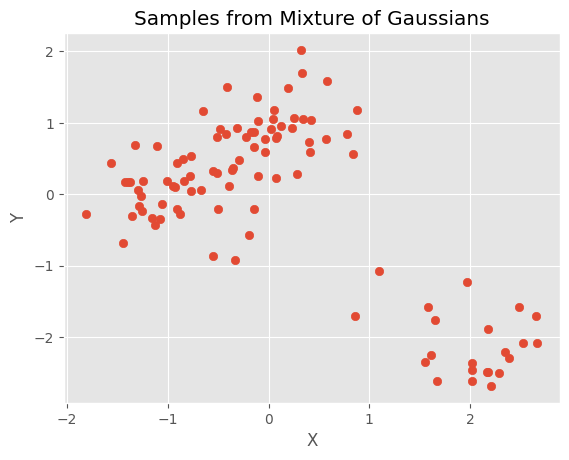

In [58]:
import matplotlib.pyplot as plt
import numpy as np

# 混合ガウス分布のパラメータ
num_components = 3
means = np.array([[-1, 0], [0, 1], [2, -2]])
covs = np.array([[[0.2, 0], [0, 0.2]], [[0.2, 0], [0, 0.2]], [[0.2, 0], [0, 0.2]]])
weights = np.array([0.4, 0.3, 0.3])

# サンプル生成
np.random.seed(0)
samples = []
for _ in range(100):
    component = np.random.choice(num_components, p=weights)
    sample = np.random.multivariate_normal(means[component], covs[component])
    samples.append(sample)
samples = np.array(samples)

# プロット
plt.scatter(samples[:, 0], samples[:, 1])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Samples from Mixture of Gaussians')
plt.show()

このサンプルから，あなたはどの様な確率分布が生成されたのかを推定することができますか？

正解は，混合ガウス分布であるのはわかっていますが，知らない人からするとそのことをプロットからは推測できないでしょう．

## 確率分布を標本で表現する

## 例14：（解析的な形で書き表せない確率分布の可視化）
$$
d 〜\textbf{Unif}(-10,10)
$$
$$
\vec{x}|\vec{d}〜N(\vec{d}, \sigma^2)
$$
ただし，$\vec{d} = (d , 0)^{\top}$
という確率生成モデルを考えます．

$x$の分布は
$$
p(x) = \sigma \left\{\Phi\left(\frac{1-x}{\sigma}\right) - \Phi\left(\frac{-1-x}{\sigma}\right)\right\}
$$

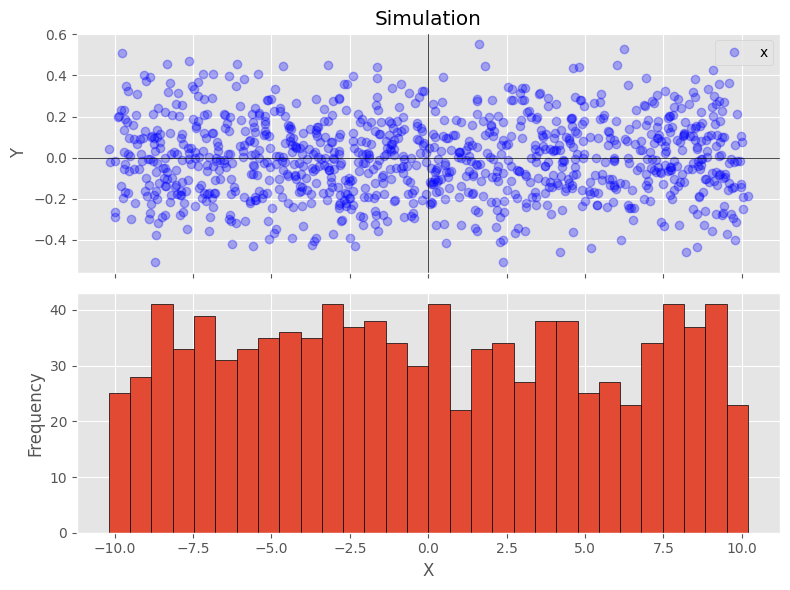

In [59]:
import matplotlib.pyplot as plt
import numpy as np

# パラメータの設定
sigma = 0.2  # 分散
num_simulations = 1000  # シミュレーション回数

# シミュレーション
np.random.seed(0)
d = np.random.uniform(-10, 10, num_simulations)
d_vec = np.zeros((num_simulations, 2))
d_vec[:, 0] = d
x = np.random.normal(d_vec, sigma)

# 結果の表示とプロット
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(8, 6))

ax1.plot(x[:, 0], x[:, 1], 'bo', alpha=0.3, label='x')
ax1.axhline(0, color='black', linewidth=0.5)
ax1.axvline(0, color='black', linewidth=0.5)
ax1.set_ylabel('Y')
ax1.set_title('Simulation')
ax1.legend()

ax2.hist(x[:, 0], bins=30, edgecolor='black')
ax2.set_xlabel('X')
ax2.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## 例15（解析的な形で書き表せない確率分布に関するベイズ推定）
先程の生成モデルにおいて$\sigma$が未知であるとします．

そこで$\sigma$の事前分布を
$$
p(\sigma^2) = \textbf{Unif}(0.1,2)
$$
として，標本$\vec{x}$から$\sigma^2$の事後分布を計算しましょう．

## 例16（カーネル密度推定）
カーネル密度推定法は，確率分布推定のための最も簡単な方法の1つで，ノンパラメトリックな方法です．

B個の標本$\vec{x} = (x_1, ..., x_B)$が得られたとします．これを用いて，密度関数の推定値$\hat{p}(x)$を以下のように求めることができます．
$$
\hat{p}(x) = \frac{1}{K}\sum_{k=1}^K h_k(x)
$$
ここで，$h_k(x) \ge 0 , k=1,...,K$はk番目の基底関数であり，正規化されているものとします．

特にカーネル密度推定では，B個の標本それぞれに対して基底関数を以下の様に定めた場合をいいます．
$$
h_b (x) = h \left(\frac{x_b - x}{\sigma} \right)
$$
ここで，$h(x)$は正値を取る任意の関数であり，カーネル関数と呼びます．$\sigma$はバンド幅と呼ばれる基底の半径を制御します．

公式ページ：https://docs.scipy.org/doc/scipy/reference/stats.html

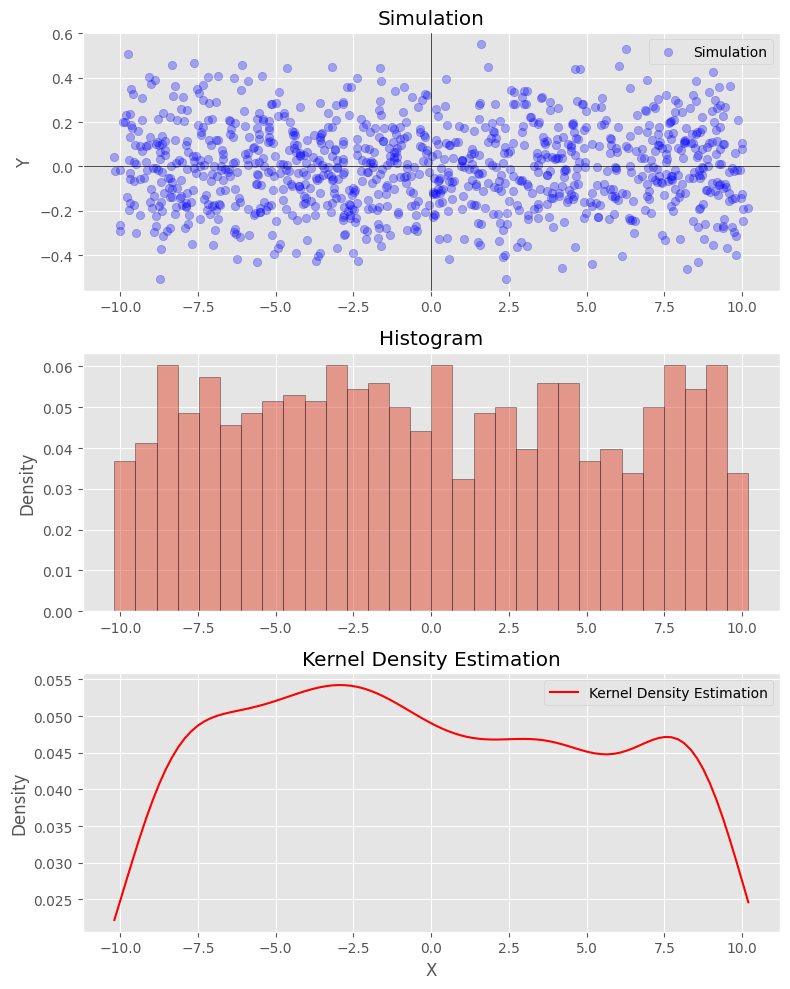

In [60]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde
'''
修正したコードでは、scipy.statsモジュールのgaussian_kde関数を使用してカーネル密度推定を行います。
gaussian_kde関数にデータセットのX軸の値を渡すことで、カーネル密度推定の結果を得ることができます。
'''

# パラメータの設定
sigma = 0.2  # 分散
num_simulations = 1000  # シミュレーション回数

# シミュレーション
np.random.seed(0)
d = np.random.uniform(-10, 10, num_simulations)
d_vec = np.zeros((num_simulations, 2))
d_vec[:, 0] = d
x = np.random.normal(d_vec, sigma)

# カーネル密度推定の実行
kde = gaussian_kde(x[:, 0])

# プロット
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(8, 10))

# シミュレーション結果のプロット
ax1.scatter(x[:, 0], x[:, 1], c='blue', alpha=0.3, label='Simulation')
ax1.axhline(0, color='black', linewidth=0.5)
ax1.axvline(0, color='black', linewidth=0.5)
ax1.set_ylabel('Y')
ax1.set_title('Simulation')
ax1.legend()

# 元データのヒストグラムのプロット
ax2.hist(x[:, 0], bins=30, density=True, alpha=0.5, edgecolor='black')
ax2.set_ylabel('Density')
ax2.set_title('Histogram')

# カーネル密度推定の結果のプロット
x_vals = np.linspace(min(x[:, 0]), max(x[:, 0]), 100)
y_vals = kde(x_vals)
ax3.plot(x_vals, y_vals, 'r-', label='Kernel Density Estimation')
ax3.set_xlabel('X')
ax3.set_ylabel('Density')
ax3.set_title('Kernel Density Estimation')
ax3.legend()

plt.tight_layout()
plt.show()

## 例17（ニューラルネットワークを用いた分布推定法）

深層ニューラルネットワークを用いた分布推定は，新しい方法です．敵対的生成ネットワークなどが有名です．

以下簡単に概要を説明します．

適当な次元$D$のガウス分布から生成されたベクトルパターン$x 〜 \mathbb{N}(0 , I)$を，ニューラルネットワーク$f(x;w)$に通して変換するという確率的生成モデル$y = f(x;w)$によって，画像や音声などを表す高次元ベクトルパターン$y$の確率分布を表現します．

例えば，人間の顔画像データが多数用意された時．新しい顔画像を生成するような確率的生成モデル$y = f(x;w)$のパラメータ$w$を学習することで，新しい顔画像を生成することができます．